<a href="https://colab.research.google.com/github/thisishasan/slda/blob/hasan/assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np
import os

In [29]:
# -----------------------------------
# Dataset Download and Loading
# -----------------------------------

# Download the dataset using Kaggle API (Ensure kaggle.json is set up)
os.system("kaggle datasets download -d hellbuoy/car-price-prediction")
os.system("unzip -o car-price-prediction.zip -d ./car_price_data")

# Load the dataset
df = pd.read_csv('./car_price_data/CarPrice_Assignment.csv')

In [30]:
# -----------------------------------
# Dataset Description
# -----------------------------------

# Basic information about the dataset
print("Dataset Information:")
df.info()

# Checking for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Summary statistics for numerical features
print("\nSummary Statistics:")
print(df.describe())

# Unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 n

In [31]:
# -----------------------------------
# Data Preprocessing
# -----------------------------------

# Handle missing values (numerical: median, categorical: mode)
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Create new feature: Car Age (if 'year' exists)
if 'year' in df.columns:
    df['car_age'] = 2025 - df['year']

# Scale numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('price', errors='ignore')
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


Dataset Information After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    float64
 1   symboling         205 non-null    float64
 2   CarName           205 non-null    float64
 3   fueltype          205 non-null    float64
 4   aspiration        205 non-null    float64
 5   doornumber        205 non-null    float64
 6   carbody           205 non-null    float64
 7   drivewheel        205 non-null    float64
 8   enginelocation    205 non-null    float64
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    float64
 15  cylindernumber    205 non-null    float64
 16  en

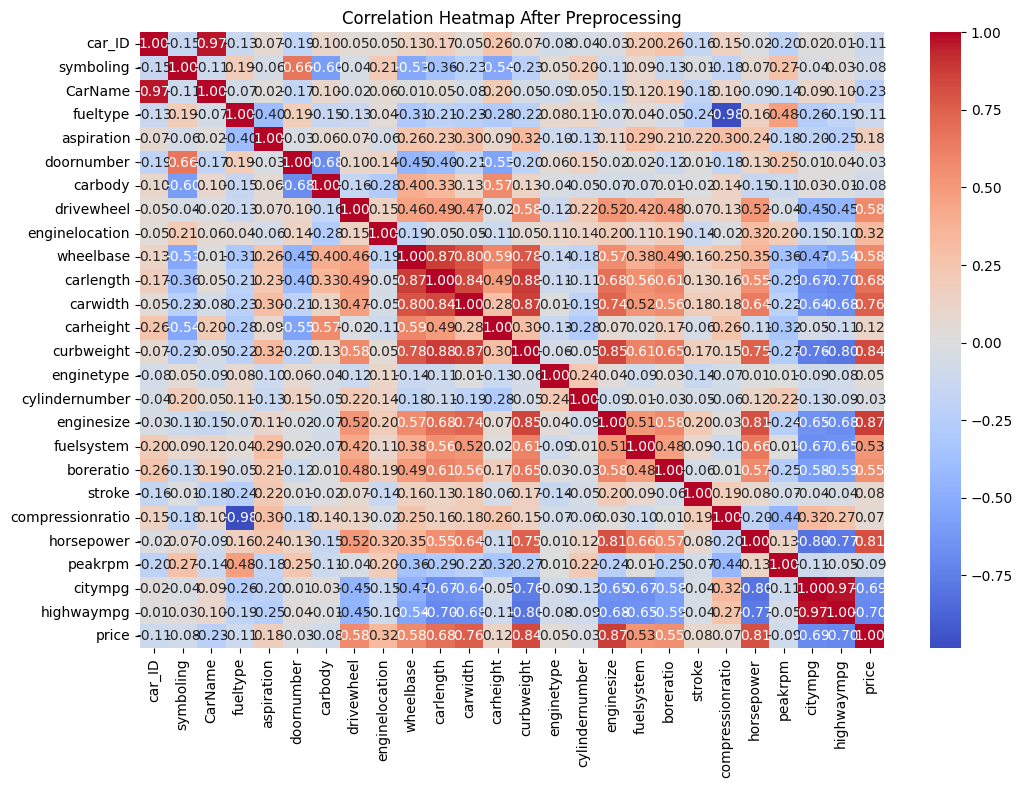

In [33]:
# -----------------------------------
# Dataset Description After Preprocessing
# -----------------------------------

# Basic information after preprocessing
print("\nDataset Information After Preprocessing:")
df.info()

# Summary statistics after preprocessing
print("\nSummary Statistics After Preprocessing:")
print(df.describe())

# Correlation heatmap after preprocessing
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap After Preprocessing')
plt.show()

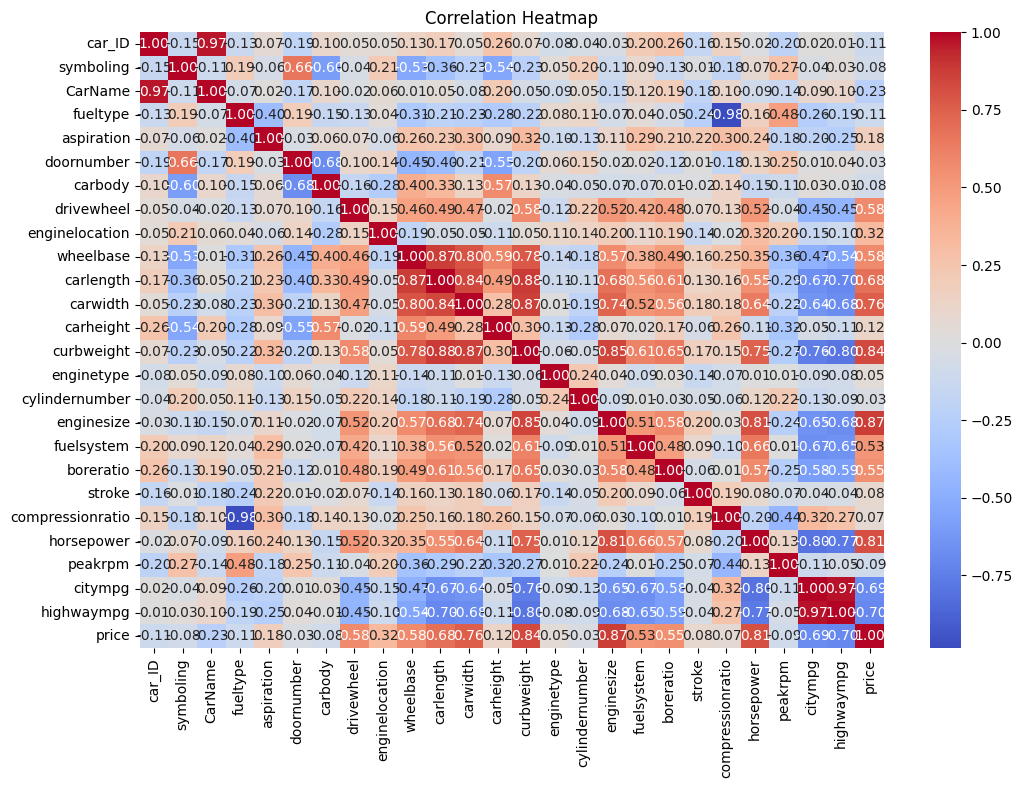

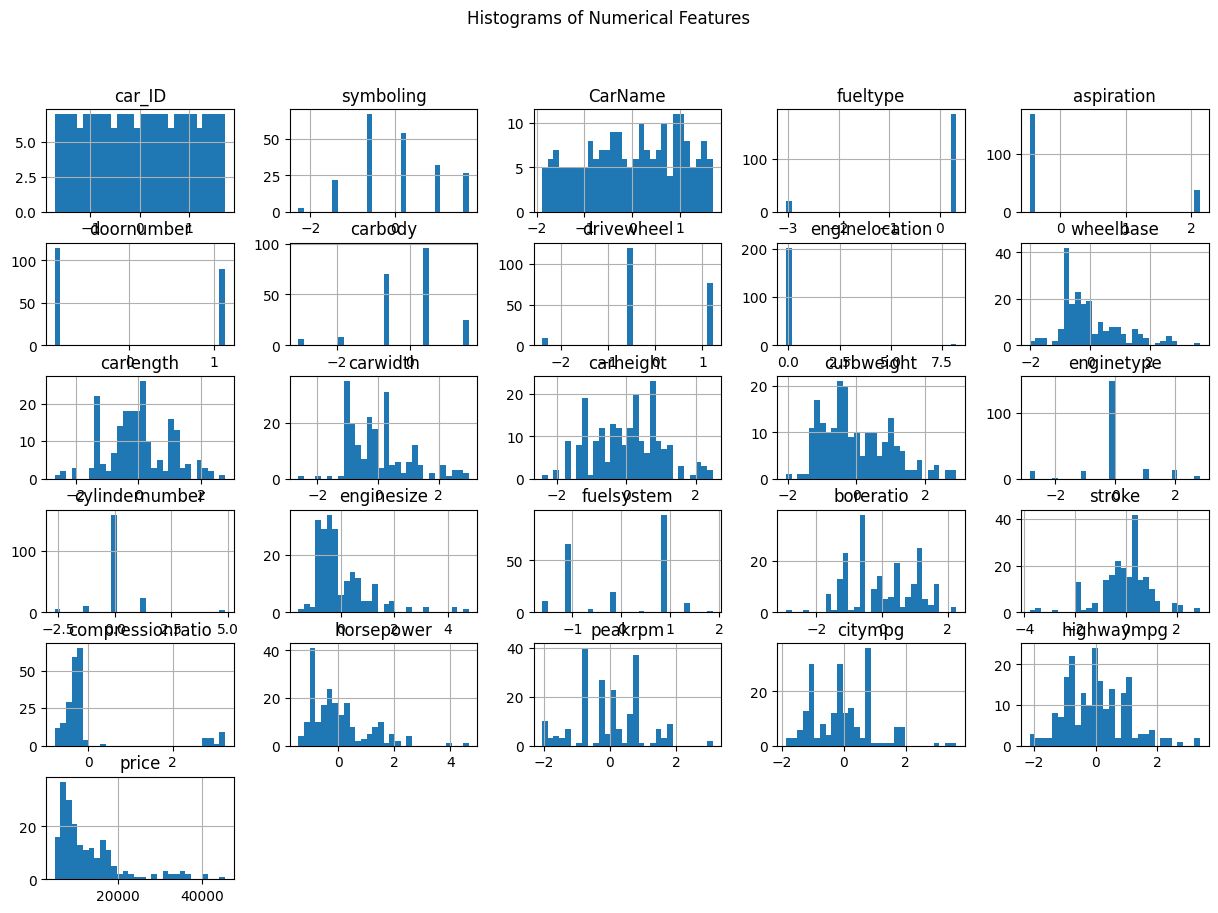

In [34]:
# -----------------------------------
# Exploratory Data Analysis (EDA)
# -----------------------------------

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Histograms for numerical features
df.hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [35]:
# -----------------------------------
# Model Building
# -----------------------------------

# Split dataset into features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# Ridge Regression with Hyperparameter Tuning
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(ridge, ridge_params, cv=5)
grid_ridge.fit(X_train, y_train)
y_pred_ridge = grid_ridge.predict(X_test)

# Lasso Regression with Hyperparameter Tuning and Increased Max Iterations
lasso = Lasso(max_iter=10000)  # Increased max_iter to ensure convergence
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_lasso = GridSearchCV(lasso, lasso_params, cv=5)
grid_lasso.fit(X_train, y_train)
y_pred_lasso = grid_lasso.predict(X_test)


Model Comparison:
               Model       R^2          MAE         RMSE
0  Linear Regression  0.844116  2087.306212  3508.008167
1   Ridge Regression  0.847629  2188.248405  3468.255750
2   Lasso Regression  0.856391  2147.727863  3367.052477


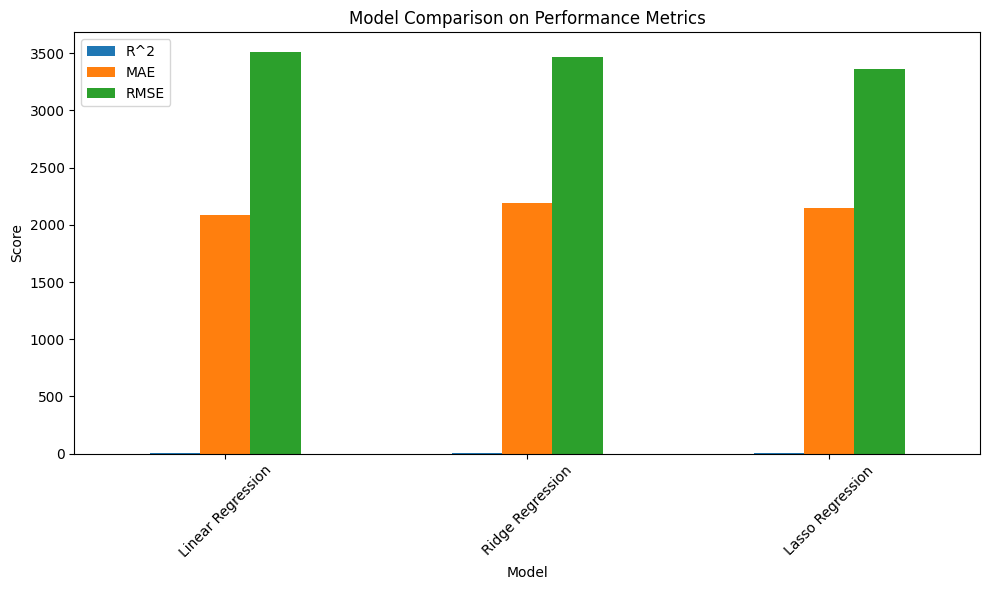

In [36]:
# -----------------------------------
# Model Evaluation and Comparison
# -----------------------------------

def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, mae, rmse

# Evaluate models
lr_metrics = evaluate_model(y_test, y_pred_lr)
ridge_metrics = evaluate_model(y_test, y_pred_ridge)
lasso_metrics = evaluate_model(y_test, y_pred_lasso)

# Compare model performance
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'R^2': [lr_metrics[0], ridge_metrics[0], lasso_metrics[0]],
    'MAE': [lr_metrics[1], ridge_metrics[1], lasso_metrics[1]],
    'RMSE': [lr_metrics[2], ridge_metrics[2], lasso_metrics[2]]
})
print("\nModel Comparison:")
print(comparison_df)

# Visualization
comparison_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison on Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
# -----------------------------------
# Overfitting/Underfitting Analysis
# -----------------------------------

print("\nOverfitting/Underfitting Analysis:")
if lr_metrics[0] < 0.5:
    print("Linear Regression is underfitting. Consider adding polynomial features or interaction terms.")
if ridge_metrics[0] > lr_metrics[0]:
    print("Ridge Regression improves performance and reduces overfitting compared to Linear Regression.")
if lasso_metrics[0] < ridge_metrics[0]:
    print("Lasso Regression may have overly penalized some features, potentially leading to underfitting.")



Overfitting/Underfitting Analysis:
Ridge Regression improves performance and reduces overfitting compared to Linear Regression.
